In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
begin = '1993-02-01'
yf.pdr_override() 
ticker = 'SPY'
df = pdr.get_data_yahoo(ticker, begin)
df.to_csv('/Users/antoinesfeir/Documents/GitHub/SWMG/QuantU/wwwroot/ml/SPY_StockPrices.csv')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date(Yr)')

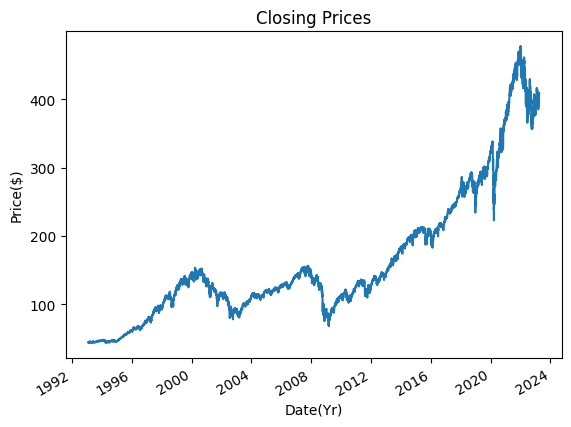

In [3]:
close = df['Close']

close.plot()
plt.title('Closing Prices')
plt.ylabel('Price($)')
plt.xlabel('Date(Yr)')


In [4]:
close.to_csv('/Users/antoinesfeir/Documents/GitHub/SWMG/QuantU/wwwroot/ml/SPY_ClosingPrice.csv')

Text(0.5, 0, 'Date(days)')

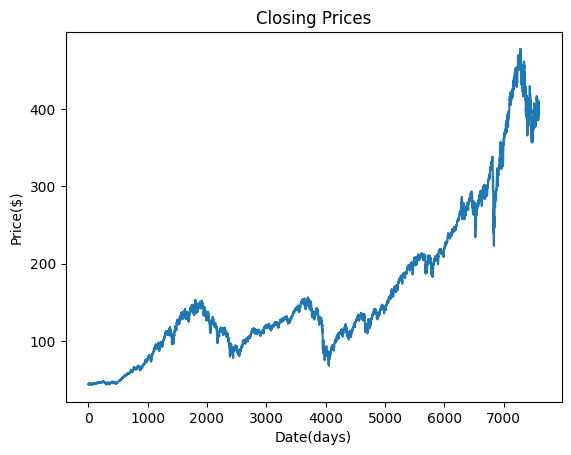

In [5]:
ds = close.values
plt.plot(ds)
plt.title('Closing Prices')
plt.ylabel('Price($)')
plt.xlabel('Date(days)')

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [8]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70) # train set is 70%
test_size = len(ds_scaled) - train_size # test is the other 30%


In [9]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),: 1]

In [10]:
#creating dataset in time series for LSTM model 
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [11]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [12]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

2023-04-01 11:38:32.109474: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

2023-04-01 11:38:35.334100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
82/82 [==============================] - 13s 126ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 2/100
82/82 [==============================] - 10s 119ms/step - loss: 6.7812e-05 - val_loss: 0.0017
Epoch 3/100
82/82 [==============================] - 10s 119ms/step - loss: 6.5584e-05 - val_loss: 0.0016
Epoch 4/100
82/82 [==============================] - 10s 119ms/step - loss: 6.2778e-05 - val_loss: 0.0015
Epoch 5/100
82/82 [==============================] - 10s 118ms/step - loss: 6.0596e-05 - val_loss: 0.0019
Epoch 6/100
82/82 [==============================] - 10s 119ms/step - loss: 5.8516e-05 - val_loss: 0.0013
Epoch 7/100
82/82 [==============================] - 10s 119ms/step - loss: 5.6946e-05 - val_loss: 9.7604e-04
Epoch 8/100
82/82 [==============================] - 10s 118ms/step - loss: 6.0025e-05 - val_loss: 0.0012
Epoch 9/100
82/82 [==============================] - 10s 119ms/step - loss: 5.4385e-05 - val_loss: 9.3005e-04
Epoch 10/100
82/82 [======================

82/82 [==============================] - 9s 114ms/step - loss: 1.2980e-05 - val_loss: 7.9692e-05
Epoch 76/100
82/82 [==============================] - 9s 114ms/step - loss: 1.1721e-05 - val_loss: 1.4171e-04
Epoch 77/100
82/82 [==============================] - 9s 114ms/step - loss: 1.0457e-05 - val_loss: 1.2359e-04
Epoch 78/100
82/82 [==============================] - 9s 114ms/step - loss: 1.2872e-05 - val_loss: 8.2638e-05
Epoch 79/100
82/82 [==============================] - 9s 114ms/step - loss: 1.1695e-05 - val_loss: 9.0233e-05
Epoch 80/100
82/82 [==============================] - 9s 114ms/step - loss: 1.2194e-05 - val_loss: 9.5663e-05
Epoch 81/100
82/82 [==============================] - 9s 115ms/step - loss: 1.1075e-05 - val_loss: 1.0025e-04
Epoch 82/100
82/82 [==============================] - 9s 116ms/step - loss: 1.1536e-05 - val_loss: 8.6737e-05
Epoch 83/100
82/82 [==============================] - 10s 117ms/step - loss: 1.2006e-05 - val_loss: 1.1839e-04
Epoch 84/100
82/82 [==

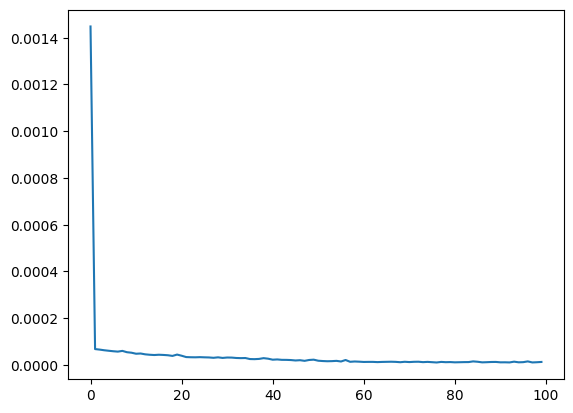

In [16]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss, label='How much we where off from the actual prices')


In [17]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

69/69 [==============================] - 2s 22ms/step


In [18]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

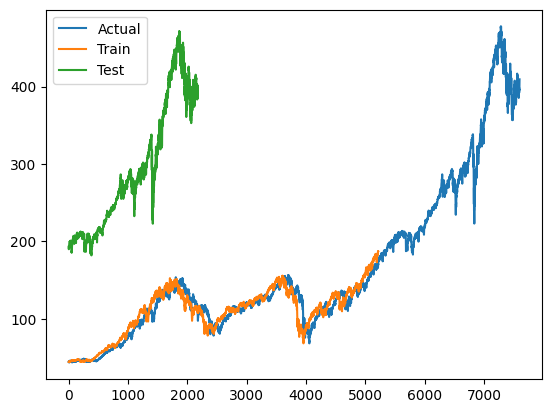

In [40]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled), label="Actual")
plt.plot(train_predict, label="Train")
plt.plot(test_predict, label="Test")
plt.legend()

In [41]:
test = np.vstack((train_predict,test_predict))

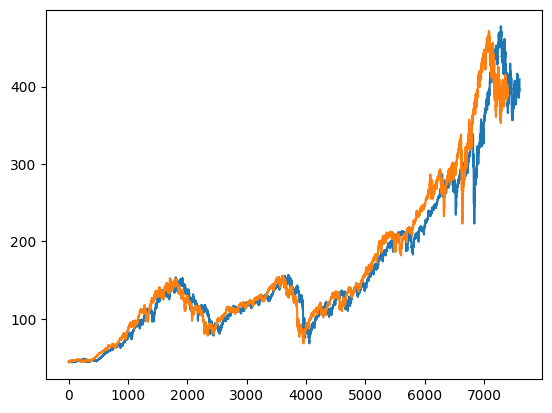

In [42]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled), label = "Acual Closing Price")
plt.plot(test, label='Predicted Closing Price')

In [43]:
#Getting the last 100 days records
fut_inp = ds_test[2180:]
print(len(fut_inp))

100


In [44]:
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)

#Creating list of the last 728 data
tmp_inp = tmp_inp[0].tolist()

In [45]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

print(len(ds_scaled))

[[0.8406723737716675], [0.8314887285232544], [0.8221792578697205], [0.8130625486373901], [0.8048677444458008], [0.7977012991905212], [0.7913641333580017], [0.785595715045929], [0.7801845669746399], [0.7750028967857361], [0.7699985504150391], [0.7651645541191101], [0.7605190873146057], [0.7560821771621704], [0.7518681883811951], [0.7478818297386169], [0.7441182732582092], [0.7405654788017273], [0.7372071146965027], [0.7340237498283386], [0.7309964299201965], [0.7281045913696289], [0.7253308892250061], [0.7226571440696716], [0.7200679183006287], [0.7175490260124207], [0.7150877118110657], [0.7126728892326355], [0.7102953195571899], [0.7079469561576843]]
7597


Text(0.5, 1.0, 'Dummy Graph for Testing')

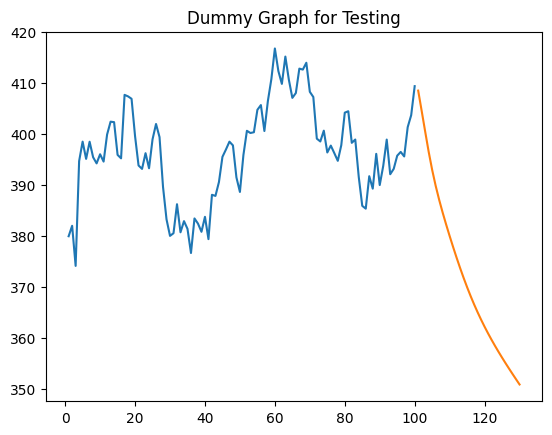

In [46]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[7497:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))
plt.title("Dummy Graph for Testing")

7627


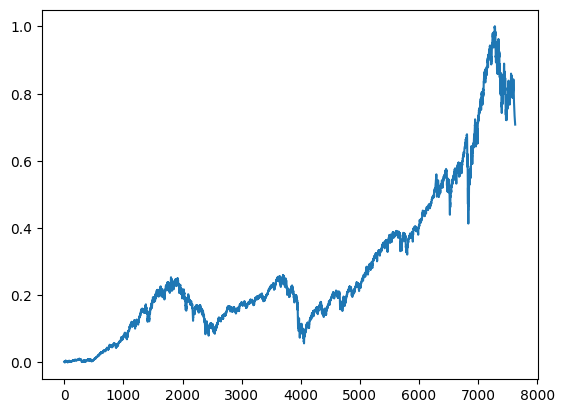

In [47]:
ds_new = ds_scaled.tolist()
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new)
print(len(ds_new))

In [48]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()


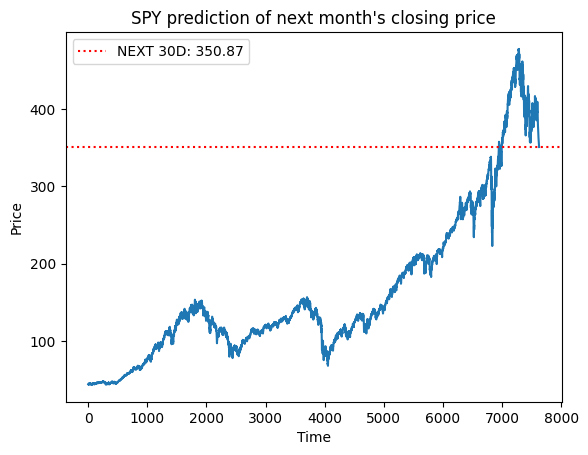

In [49]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month's closing price".format(ticker))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()


In [62]:
# generate a range of dates starting from April 1st, 2023 and ending on April 30th, 2023
start_date = np.datetime64('2023-04-01')
end_date = np.datetime64('2023-05-01') + np.timedelta64(1, 'D')
dates = np.arange(start_date, end_date, dtype='datetime64[D]')

# create a list of tuples containing date and price data
data = []
for i in range(31):
    date = dates[i]
    price = final_graph[-1]
    data.append((date, price))

# write the data to a CSV file
import csv
with open('/Users/antoinesfeir/Documents/GitHub/SWMG/QuantU/wwwroot/ml/SPY_30DayForcast.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Price'])  # write header row
    for date, price in data:
        writer.writerow([date, price])

In [51]:
ONNXModelPath = "../Users/antoinesfeir/Documents/GitHub/SWMG/QuantU/wwwroot/ml"

from onnx import __version__, IR_VERSION
from onnx.defs import onnx_opset_version
print(f"onnx.__version__={__version__!r}, opset={onnx_opset_version()}, IR_VERSION={IR_VERSION}")

onnx.__version__='1.13.1', opset=18, IR_VERSION=8


In [52]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as rt

In [53]:
num_features = 1
intitial_type = [('feature_input', FloatTensorType([None, num_features]))]
onx = convert_sklearn(model, intitial_types=intitial_type)
with open(ONNXModelPath, "wb") as f:
    f.write(onx.SerializeToString())

TypeError: convert_sklearn() got an unexpected keyword argument 'intitial_types'